# Calculation of Schmid factors for uniaxial loading of body-centered cubic (bcc) single crystal

This notebook computes the Schmid factors on the 12 primary slip systems of bcc materials: {110}<111>

**How to use:**
1. Input the crystallographic direction of the application of the load
2. The script computes the Schmid factors of the 12 slip systems
3. The script displays the top glide systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D projection

In [2]:
# ===============================
# List the 12 slip systems (+/- signs) for BCC {110}<111>
# ===============================

# --- Define BCC {110} planes (6 unique) ---
planes = [
    (1,  1,  0),
    (1, -1,  0),
    (1,  0,  1),
    (1,  0, -1),
    (0,  1,  1),
    (0,  1, -1),
]

# --- Define unique <111> directions (4 unique, first component = +1) ---
directions = [
    (1,  1,  1),
    (1,  1, -1),
    (1, -1,  1),
    (1, -1, -1),
]

# --- Build slip systems (plane, direction) such that direction lies in plane ---
slip_systems = []
for plane in planes:
    for direction in directions:
        if np.dot(plane, direction) == 0:
            slip_systems.append((plane, direction))

print("BCC {110}<111> slip systems")
print("Plane(hkl)   Direction[uvw]\n---------------------------")
for s in slip_systems:
    hkl = s[0]
    uvw = s[1]
    print(
        f"({hkl[0]:2d},{hkl[1]:2d},{hkl[2]:2d})   "
        f"[{uvw[0]:3d},{uvw[1]:3d},{uvw[2]:3d}]"
    )

if len(slip_systems) != 12:
    raise RuntimeError(f"Expected 12 BCC slip systems, got {len(slip_systems)}")

BCC {110}<111> slip systems
Plane(hkl)   Direction[uvw]
---------------------------
( 1, 1, 0)   [  1, -1,  1]
( 1, 1, 0)   [  1, -1, -1]
( 1,-1, 0)   [  1,  1,  1]
( 1,-1, 0)   [  1,  1, -1]
( 1, 0, 1)   [  1,  1, -1]
( 1, 0, 1)   [  1, -1, -1]
( 1, 0,-1)   [  1,  1,  1]
( 1, 0,-1)   [  1, -1,  1]
( 0, 1, 1)   [  1,  1, -1]
( 0, 1, 1)   [  1, -1,  1]
( 0, 1,-1)   [  1,  1,  1]
( 0, 1,-1)   [  1, -1, -1]


In [3]:
# ===============================
# Input: load direction [u v w]
# ===============================

load_dir = [0, 1, 2] # <-- user can change the direction of uniaxial loading (default = [1, 2, 3])

print("\nUniaxial loading direction:", load_dir, "\n")

# --- Normalize load direction ---
load_vec = np.array(load_dir, dtype=float)
load_norm = np.linalg.norm(load_vec)
if load_norm == 0:
    raise ValueError("Zero loading direction is not allowed.")
load_unit = load_vec / load_norm


Uniaxial loading direction: [0, 1, 2] 



In [4]:
# ===============================
# Compute individual Schmid factors for 12 BCC glide systems
# ===============================
results = []

for plane, direction in slip_systems:

    # Convert plane and direction to numpy arrays
    plane_vec = np.array(plane, dtype=float)
    dir_vec = np.array(direction, dtype=float)

    # Normalize plane normal
    plane_norm = np.linalg.norm(plane_vec)
    if plane_norm == 0:
        raise ValueError("Zero plane normal encountered.")
    normal_unit = plane_vec / plane_norm

    # Normalize slip direction
    dir_norm = np.linalg.norm(dir_vec)
    if dir_norm == 0:
        raise ValueError("Zero slip direction encountered.")
    slip_dir_unit = dir_vec / dir_norm

    # Compute cos(phi), cos(lambda)
    cos_plane_angle = np.dot(normal_unit, load_unit)
    cos_slip_angle = np.dot(slip_dir_unit, load_unit)

    # Angles in degrees
    phi_deg = np.degrees(np.arccos(np.clip(cos_plane_angle, -1.0, 1.0)))
    lambda_deg = np.degrees(np.arccos(np.clip(cos_slip_angle, -1.0, 1.0)))

    # Schmid factor
    m = cos_plane_angle * cos_slip_angle
    direction_used = direction

    # Flip slip direction if needed so m >= 0
    if m < 0:
        direction_used = tuple(-x for x in direction)
        dir_vec_flipped = np.array(direction_used, dtype=float)
        slip_dir_unit = dir_vec_flipped / np.linalg.norm(dir_vec_flipped)
        cos_slip_angle = np.dot(slip_dir_unit, load_unit)
        lambda_deg = np.degrees(np.arccos(np.clip(cos_slip_angle, -1.0, 1.0)))
        m = cos_plane_angle * cos_slip_angle

    results.append({
        "plane": plane,
        "direction": direction_used,
        "phi_deg": phi_deg,
        "lambda_deg": lambda_deg,
        "cos_plane_angle": cos_plane_angle,
        "cos_slip_angle": cos_slip_angle,
        "m": m
    })

# --- Sort by Schmid factor descending ---
results_sorted = sorted(results, key=lambda r: -r["m"])

# --- Print header ---
header = (
    "Plane(hkl)   Direction[uvw]   phi(deg)   lambda(deg)   "
    "cos(phi)    cos(lambda)   Schmid factor m"
)
print("\nSchmid factors for BCC {110}<111> slip systems")
print(header)
print("-" * len(header))

# --- Print table ---
for r in results_sorted:
    hkl = r["plane"]
    uvw = r["direction"]
    print(
        f"({hkl[0]:2d},{hkl[1]:2d},{hkl[2]:2d})   "
        f"[{uvw[0]:3d},{uvw[1]:3d},{uvw[2]:3d}]   "
        f"{r['phi_deg']:8.2f}   "
        f"{r['lambda_deg']:11.2f}   "
        f"{r['cos_plane_angle']:9.4f}   "
        f"{r['cos_slip_angle']:11.4f}   "
        f"{r['m']:9.4f}"
    )


Schmid factors for BCC {110}<111> slip systems
Plane(hkl)   Direction[uvw]   phi(deg)   lambda(deg)   cos(phi)    cos(lambda)   Schmid factor m
------------------------------------------------------------------------------------------------
( 1, 0, 1)   [ -1,  1,  1]      50.77         39.23      0.6325        0.7746      0.4899
( 1, 0,-1)   [ -1, -1, -1]     129.23        140.77     -0.6325       -0.7746      0.4899
( 0, 1, 1)   [ -1, -1,  1]      18.43         75.04      0.9487        0.2582      0.2449
( 0, 1, 1)   [  1, -1,  1]      18.43         75.04      0.9487        0.2582      0.2449
( 1, 1, 0)   [ -1,  1,  1]      71.57         39.23      0.3162        0.7746      0.2449
( 1,-1, 0)   [ -1, -1, -1]     108.43        140.77     -0.3162       -0.7746      0.2449
( 0, 1,-1)   [ -1, -1, -1]     108.43        140.77     -0.3162       -0.7746      0.2449
( 0, 1,-1)   [  1, -1, -1]     108.43        140.77     -0.3162       -0.7746      0.2449
( 1, 0, 1)   [ -1, -1,  1]      50.77 

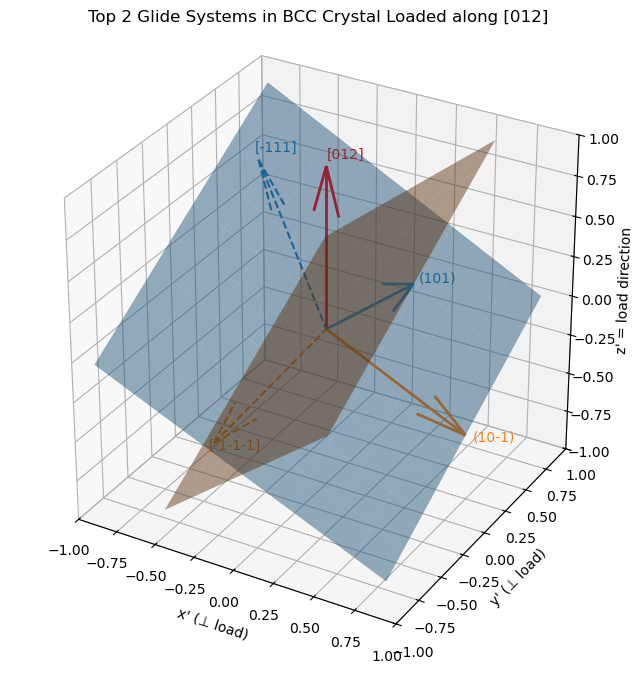

In [5]:
# ===============================
# Plot top glide systems
# ===============================
N_SYSTEMS = 2   # <-- user can change the number of top glide planes to display (default = 2)
# ===============================

# --- Build orthonormal basis where e3 = load direction ---
e3 = load_unit  # unit load direction

# choose a helper vector not parallel to e3
helper = np.array([1.0, 0.0, 0.0])
if np.allclose(np.abs(np.dot(helper, e3)), 1.0):
    helper = np.array([0.0, 1.0, 0.0])

# e1: component of helper orthogonal to e3
e1 = helper - np.dot(helper, e3) * e3
e1 = e1 / np.linalg.norm(e1)

# e2: completes right-handed system
e2 = np.cross(e3, e1)
e2 = e2 / np.linalg.norm(e2)

# Rotation matrix
R = np.vstack([e1, e2, e3])

# --- Select N_SYSTEMS glide systems on N_SYSTEMS different planes ---
top_unique = []
used_planes = set()

for r in results_sorted:
    plane = tuple(r["plane"])
    if plane not in used_planes:
        top_unique.append(r)
        used_planes.add(plane)
    if len(top_unique) == N_SYSTEMS:
        break

# reorder selection from LOWEST to HIGHEST Schmid factor for correct drawing order
top_unique = sorted(top_unique, key=lambda x: x["m"])

# --- Assign colors (repeat cyclically if needed) ---
default_colors = ["tab:blue", "tab:orange", "tab:green", "tab:red",
                  "tab:purple", "tab:brown", "tab:pink"]
colors = (default_colors * (N_SYSTEMS // len(default_colors) + 1))[:N_SYSTEMS]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

# --- Plot the load direction as vertical axis ---
ax.quiver(0, 0, 0, 0, 0, 1.0, length=1.0, color='r', linewidth=2)
ax.text(0, 0, 1.05, f"[{int(load_dir[0])}{int(load_dir[1])}{int(load_dir[2])}]", color='r')

# --- Plot the N_SYSTEMS glide systems ---
for (r, col) in zip(top_unique, colors):

    hkl = r["plane"]
    uvw = r["direction"]

    # plane normal & slip direction (crystal coords)
    n = np.array(hkl, dtype=float)
    n_unit = n / np.linalg.norm(n)

    s = np.array(uvw, dtype=float)
    s_unit = s / np.linalg.norm(s)

    # construct u and v (in-plane orthonormal vectors)
    a = np.array([1.0, 0.0, 0.0])
    if np.allclose(np.abs(np.dot(a, n_unit)), 1.0):
        a = np.array([0.0, 1.0, 0.0])

    u = a - np.dot(a, n_unit) * n_unit
    u = u / np.linalg.norm(u)

    v = np.cross(n_unit, u)
    v = v / np.linalg.norm(v)

    # Create patch grid in crystal coordinate frame
    span = np.linspace(-1, 1, 10)
    S, T = np.meshgrid(span, span)

    Xc = S * u[0] + T * v[0]
    Yc = S * u[1] + T * v[1]
    Zc = S * u[2] + T * v[2]

    # rotate into load-aligned frame
    P_crystal = np.vstack([Xc.flatten(), Yc.flatten(), Zc.flatten()])
    P_load = R @ P_crystal

    Xp = P_load[0].reshape(Xc.shape)
    Yp = P_load[1].reshape(Yc.shape)
    Zp = P_load[2].reshape(Zc.shape)

    # --- Plot the slip plane ---
    ax.plot_surface(Xp, Yp, Zp, alpha=0.45, color=col)

    # --- Plane normal ---
    n_load = R @ n_unit
    ax.quiver(0, 0, 0, n_load[0], n_load[1], n_load[2],
              length=1.0, color=col, linewidth=2)
    ax.text(*(n_load * 1.05), f"({hkl[0]}{hkl[1]}{hkl[2]})", color=col)

    # --- Slip direction vector ---
    s_load = R @ s_unit
    ax.quiver(0, 0, 0, s_load[0], s_load[1], s_load[2],
              length=1.0, color=col, linestyle='dashed')
    ax.text(*(s_load * 1.05), f"[{uvw[0]}{uvw[1]}{uvw[2]}]", color=col)

# --- Formatting ---
ax.set_xlabel("x' (⊥ load)")
ax.set_ylabel("y' (⊥ load)")
ax.set_zlabel("z' = load direction")
ax.set_title(f"Top {N_SYSTEMS} Glide Systems in BCC Crystal Loaded along "
             f"[{int(load_dir[0])}{int(load_dir[1])}{int(load_dir[2])}]")

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_box_aspect([1, 1, 1])

plt.show()